<a href="https://colab.research.google.com/github/Samdatascienti/Samdatascienti/blob/main/Drug_prediction_supplier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# as usual, let us load all the necessary libraries
import numpy as np  # numerical computation with arrays
import pandas as pd # library to manipulate datasets using dataframes
import scipy as sp  # statistical library
from google.colab import files

# below sklearn libraries for different models
from sklearn.tree import DecisionTreeClassifier as DecisionTree
from sklearn.ensemble import RandomForestClassifier as RandomForest
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.impute import KNNImputer
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler

#import libraries for implementing neural networks
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD, Adam
from keras.regularizers import l2
from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.preprocessing.sequence import TimeseriesGenerator
import tensorflow as tf
# plot 
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
mpl.rcParams['figure.figsize']=(10,8)
mpl.rcParams['axes.grid']='False'


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
path_1='/content/gdrive/MyDrive/Drug_prediction/new_data.csv'
data_1=pd.read_csv(path_1)
data_1.head()

,Unnamed: 0,Received Date,Item Description,Customer Name,Quantity,Promise Delivery,Unit Price,Total Amount
0,3,24/11/2015 09:11 SAST,NEVIRAPINE 200MG TABLET B/60,BUGESERA PD--1095 of MPPD,1582.0,17/11/2015 08:06 SAST,0.0,0.0
1,32,24/11/2015 08:59 SAST,AMOXICILLIN 250MG CAPSULE B/1000,BUGESERA PD--1095 of MPPD,0.0,17/11/2015 23:14 SAST,0.0,0.0
2,33,24/11/2015 08:59 SAST,O.R.S SACHET 20.5G B/100,BUGESERA PD--1095 of MPPD,0.0,17/11/2015 23:14 SAST,0.0,0.0
3,39,24/11/2015 08:05 SAST,AMOXICILLIN 250MG CAPSULE B/1000,BUGESERA PD--1095 of MPPD,200.0,17/11/2015 02:09 SAST,10574.0,2114800.0
4,53,24/11/2015 08:05 SAST,IODINE POLYVIDONE 10% SLN 200ML B/1,BUGESERA PD--1095 of MPPD,500.0,17/11/2015 02:09 SAST,2182.0,1091000.0


In [ ]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108791 entries, 0 to 108790
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        108791 non-null  int64  
 1   Received Date     90763 non-null   object 
 2   Item Description  108791 non-null  object 
 3   Customer Name     108791 non-null  object 
 4   Quantity          108780 non-null  float64
 5   Promise Delivery  108791 non-null  object 
 6   Unit Price        108791 non-null  float64
 7   Total Amount      108780 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 6.6+ MB


In [ ]:
data_1.isnull().sum()

Unnamed: 0              0
Received Date       18028
Item Description        0
Customer Name           0
Quantity               11
Promise Delivery        0
Unit Price              0
Total Amount           11
dtype: int64

In [ ]:

df_1=data_1[['Received Date','Item Description','Customer Name','Promise Delivery','Total Amount']]
df_1.head()

,Received Date,Item Description,Customer Name,Promise Delivery,Total Amount
0,24/11/2015 09:11 SAST,NEVIRAPINE 200MG TABLET B/60,BUGESERA PD--1095 of MPPD,17/11/2015 08:06 SAST,0.0
1,24/11/2015 08:59 SAST,AMOXICILLIN 250MG CAPSULE B/1000,BUGESERA PD--1095 of MPPD,17/11/2015 23:14 SAST,0.0
2,24/11/2015 08:59 SAST,O.R.S SACHET 20.5G B/100,BUGESERA PD--1095 of MPPD,17/11/2015 23:14 SAST,0.0
3,24/11/2015 08:05 SAST,AMOXICILLIN 250MG CAPSULE B/1000,BUGESERA PD--1095 of MPPD,17/11/2015 02:09 SAST,2114800.0
4,24/11/2015 08:05 SAST,IODINE POLYVIDONE 10% SLN 200ML B/1,BUGESERA PD--1095 of MPPD,17/11/2015 02:09 SAST,1091000.0


In [ ]:
# # ,errors = 'coerce'
# df['Total Amount'] = pd.to_numeric(df['Total Amount'])
# df['Unit Price'] = pd.to_numeric(df['Unit Price'])

In [ ]:
# df.info()

In [ ]:
df_2 = df_1.loc[df_1["Total Amount"] != 0.0]
print(df_1.shape)
print(df_2.shape)

(108791, 5)
(92600, 5)


In [ ]:
# new_data.loc[(new_data['Promise Delivery']>"2022-01-01")]

In [ ]:
df_2.isnull().sum()

Received Date       14551
Item Description        0
Customer Name           0
Promise Delivery        0
Total Amount           11
dtype: int64

In [ ]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 92600 entries, 3 to 108789
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Received Date     78049 non-null  object 
 1   Item Description  92600 non-null  object 
 2   Customer Name     92600 non-null  object 
 3   Promise Delivery  92600 non-null  object 
 4   Total Amount      92589 non-null  float64
dtypes: float64(1), object(4)
memory usage: 4.2+ MB


In [ ]:
# df['Total Amount'].describe()

In [ ]:
# df['Total Amount'].value_counts(normalize=False)

In [ ]:
drug=df_2['Item Description'].value_counts(normalize=False)
drug=pd.DataFrame(drug)
drug

,Item Description
AMOXICILLIN 250MG CAPSULE B/1000,15817
PARACETAMOL 500 MG TABLET B/1000,15441
CHLORPHENIRAMINE 4 MG TABLET B/1000,10906
ARTE 20MG + LUME 120MG TAB (4X6) B/30,10736
CROMOGLYCATE DISODIC OPHT SOLUTION 2%,9831
COTRIMOXAZOLE 480 MG TABLET B/1000,9399
AMINOPHYLLINE 100MG TABLET B/1000,7110
O.R.S SACHET 20.5G B/100,6568
IODINE POLYVIDONE 10% SLN 200ML B/1,6056
NEVIRAPINE 200MG TABLET B/60,736


In [ ]:
options = ['PARACETAMOL 500 MG TABLET B/1000', 'AMOXICILLIN 250MG CAPSULE B/1000',
           'CHLORPHENIRAMINE 4 MG TABLET B/1000',   'AMINOPHYLLINE 100MG TABLET B/1000']
  # NEVIRAPINE 200MG TABLET B/60, AMOXICILLIN 250MG CAPSULE B/1000,  O.R.S SACHET 20.5G B/100, ARTE 20MG + LUME 120MG TAB (4X6) B/30,
  # COTRIMOXAZOLE 480 MG TABLET B/1000         

# ,'ERYTHROMYCIN 250 MG TABLET B/1000','CLOXACILLIN 250 MG  CAPSULE B/1000','PENICILLIN V 250 MG TABLET B/1000',
#            'METRONIDAZOLE 200MG/5ML SYRUP 100ML B/1','IBUPROFEN 200 MG TABLET B/1000','TENOFOV 300MG + LAMIVUD 300 MG TAB B/30',
#            'ABACAVIR 600 MG+LAMIVU 300 MG TAB B/30'
# options = ['COTRIMOXAZOLE 480 MG TABLET B/1000', 'AMOXICILLIN 250MG CAPSULE B/1000']   
# important (AMOXICILLIN 250MG CAPSULE B/1000)

# selecting rows based on condition
new_data =df_2[df_2['Item Description'].isin(options)]
  
# print('\nResult dataframe :\n', rslt_df)
new_data.head()

,Received Date,Item Description,Customer Name,Promise Delivery,Total Amount
3,24/11/2015 08:05 SAST,AMOXICILLIN 250MG CAPSULE B/1000,BUGESERA PD--1095 of MPPD,17/11/2015 02:09 SAST,2114800.0
5,24/11/2015 08:05 SAST,AMINOPHYLLINE 100MG TABLET B/1000,BUGESERA PD--1095 of MPPD,17/11/2015 02:09 SAST,148440.0
8,13/10/2015 21:47 SAST,AMINOPHYLLINE 100MG TABLET B/1000,BUGESERA PD--1095 of MPPD,13/10/2015 21:47 SAST,74220.0
16,18/01/2016 10:21 SAST,AMINOPHYLLINE 100MG TABLET B/1000,BUGESERA PD--1095 of MPPD,05/01/2016 09:00 SAST,74220.0
17,18/01/2016 10:21 SAST,AMOXICILLIN 250MG CAPSULE B/1000,BUGESERA PD--1095 of MPPD,05/01/2016 09:00 SAST,319260.0


In [ ]:
# # Save submission file
# new_data.to_csv('new_data.csv')
# files.download('new_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
new_data.isnull().sum()

Received Date       7321
Item Description       0
Customer Name          0
Promise Delivery       0
Total Amount           0
dtype: int64

In [ ]:
new_data['Item Description'].value_counts(normalize=False)

AMOXICILLIN 250MG CAPSULE B/1000       15817
PARACETAMOL 500 MG TABLET B/1000       15441
CHLORPHENIRAMINE 4 MG TABLET B/1000    10906
AMINOPHYLLINE 100MG TABLET B/1000       7110
Name: Item Description, dtype: int64

In [ ]:
dist=new_data['Customer Name'].value_counts(normalize=False)
dist=pd.DataFrame(dist)
dist.tail(20)

,Customer Name
RUTONGO HD--282 of RULINDO PD--1082,10
RUKOZO CS--279 of RULINDO PD--1082,10
Gatsata Health Center--2351 of GASABO PD--1090,8
BITENGA CS--178 of RUTSIRO PD--1093,8
KINIHIRA HOSPITAL--1313 of RULINDO PD--1082,7
NYABIHEKE CS--610 of GATSIBO PD--1073,7
KANOMBE HM--34 of MPPD,6
RULINDO CS--280 of RULINDO PD--1082,6
CARAES NDERA--14 of GASABO PD--1090,5
MASORO CS--275 of RULINDO PD--1082,5


In [ ]:
# # Save submission file
# dist.to_csv('dist.csv')
# files.download('dist.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
new_data['Customer Name'].value_counts(normalize=False)

KIBUNGO CS--435 of NGOMA PD--1076               328
MUTENDERI CS--438 of NGOMA PD--1076             295
NZANGWA CS--455 of BUGESERA PD--1095            262
TABAGWE CS--385 of NYAGATARE PD--1081           258
ZAZA CS--445 of NGOMA PD--1076                  235
                                               ... 
BITENGA CS--178 of RUTSIRO PD--1093               3
KINIHIRA HOSPITAL--1313 of RULINDO PD--1082       2
RULINDO CS--280 of RULINDO PD--1082               1
KIZIBA REFUGEE CAMP--462 of KARONGI PD--1087      1
KIYANZA CS--274 of RULINDO PD--1082               1
Name: Customer Name, Length: 599, dtype: int64

In [ ]:
# data1=new_data.replace('SAST', '')

In [ ]:
# overwriting data after changing format
new_data["Received Date"]= pd.to_datetime(new_data["Received Date"])
new_data["Promise Delivery"]= pd.to_datetime(new_data["Promise Delivery"])
new_data.info()

/usr/local/lib/python3.7/dist-packages/dateutil/parser/_parser.py:1218: UnknownTimezoneWarning: tzname SAST identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  category=UnknownTimezoneWarning)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


<class 'pandas.core.frame.DataFrame'>
Int64Index: 49274 entries, 3 to 108789
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Received Date     41953 non-null  datetime64[ns]
 1   Item Description  49274 non-null  object        
 2   Customer Name     49274 non-null  object        
 3   Promise Delivery  49274 non-null  datetime64[ns]
 4   Total Amount      49274 non-null  float64       
dtypes: datetime64[ns](2), float64(1), object(2)
memory usage: 2.3+ MB


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
new_data.head()

,Received Date,Item Description,Customer Name,Promise Delivery,Total Amount
3,2015-11-24 08:05:00,AMOXICILLIN 250MG CAPSULE B/1000,BUGESERA PD--1095 of MPPD,2015-11-17 02:09:00,2114800.0
5,2015-11-24 08:05:00,AMINOPHYLLINE 100MG TABLET B/1000,BUGESERA PD--1095 of MPPD,2015-11-17 02:09:00,148440.0
8,2015-10-13 21:47:00,AMINOPHYLLINE 100MG TABLET B/1000,BUGESERA PD--1095 of MPPD,2015-10-13 21:47:00,74220.0
16,2016-01-18 10:21:00,AMINOPHYLLINE 100MG TABLET B/1000,BUGESERA PD--1095 of MPPD,2016-05-01 09:00:00,74220.0
17,2016-01-18 10:21:00,AMOXICILLIN 250MG CAPSULE B/1000,BUGESERA PD--1095 of MPPD,2016-05-01 09:00:00,319260.0


In [ ]:
data_coded=new_data.replace(['NZANGWA CS--455 of BUGESERA PD--1095','MAYANGE CS--451 of BUGESERA PD--1095','GIHINGA CS--448 of BUGESERA PD--1095',
'JURU CS--603 of BUGESERA PD--1095','RILIMA CS--457 of BUGESERA PD--1095','NYAMATA CS--453 of BUGESERA PD--1095','NGERUKA CS--604 of BUGESERA PD--1095',
'RUHUHA CS--458 of BUGESERA PD--1095','KAMABUYE CS--449 of BUGESERA PD--1095','MAREBA CS--450 of BUGESERA PD--1095','NYARUGENGE CS--1323 of BUGESERA PD--1095',
'MWOGO CS--452 of BUGESERA PD--1095','GAKURAZO CS--446 of BUGESERA PD--1095','NYAMATA HD--454 of BUGESERA PD--1095','NTARAMA CS--1101 of BUGESERA PD--1095',
'BUGESERA PD--1095 of MPPD','GASHORA CS--447 of BUGESERA PD--1095','PRISON RILIMA (VIA CS) PRIS--456 of BUGESERA PD--1095'], 'Bugesera')

new_data=data_coded.replace(['RUSASA CS--332 of BURERA PD--1071','GITARE CS--323 of BURERA PD--1071',
'KIRAMBO CS--326 of BURERA PD--1071','CYANIKA CS--605 of BURERA PD--1071','KINYABABA CS--325 of BURERA PD--1071','BURERA PD--1071 of MPPD',
'GAHUNGA CS--586 of BURERA PD--1071','NTARUKA CS--329 of BURERA PD--1071','KIVUYE CS--327 of BURERA PD--1071','BUNGWE CS--320 of BURERA PD--1071',
'RWERERE CS--505 of BURERA PD--1071','RUHUNDE CS--331 of BURERA PD--1071','NYAMUGALI CS--330 of BURERA PD--1071','GATEBE CS--1560 of BURERA PD--1071',
'NDONGOZI CS--1287 of BURERA PD--1071','BUTARO HD--322 of BURERA PD--1071','RUHOMBO CS--1279 of BURERA PD--1071','BUTARO CS--321 of BURERA PD--1071',
'KINONI CS--324 of BURERA PD--1071','MUCACA CS--328 of BURERA PD--1071','RUGARAMA CS--1641 of BURERA PD--1071'], 'Burera')

new_data=new_data.replace(['NYANGE (RULI) CS--298 of GAKENKE PD--1084','NEMBA DISP--296 of GAKENKE PD--1084',
'MUHONDO CS--295 of GAKENKE PD--1084','GATONDE CS--291 of GAKENKE PD--1084','KAMUBUGA CS--483 of GAKENKE PD--1084','RULI CS--301 of GAKENKE PD--1084',
'MATABA CS--294 of GAKENKE PD--1084','BUSHOKA CS--288 of GAKENKE PD--1084','MUYONGWE HC--1534 of GAKENKE PD--1084','RWANKUBA CS--307 of GAKENKE PD--1084',
'RUTAKE CS--305 of GAKENKE PD--1084','NYUNDO (GAKENKE) CS--299 of GAKENKE PD--1084','RUKURA CS--300 of GAKENKE PD--1084','MINAZI CS--1651 of GAKENKE PD--1084',
'RUSHASHI CS--303 of GAKENKE PD--1084','KARAMBO CS--293 of GAKENKE PD--1084','BUSENGO CS--287 of GAKENKE PD--1084','CYABINGO CS--290 of GAKENKE PD--1084',
'RUTENDERI CS--306 of GAKENKE PD--1084','JANJA CS--292 of GAKENKE PD--1084','RUSORO CS--304 of GAKENKE PD--1084','COKO (RULI) CS--289 of GAKENKE PD--1084',
'NGANZO CS--1650 of GAKENKE PD--1084','NEMBA HD--297 of GAKENKE PD--1084','RULI HD--302 of GAKENKE PD--1084','GAKENKE PD--1084 of MPPD'], 'Gakenke')

new_data=new_data.replace(['KABUYE CS--17 of GASABO PD--1090','NYACYONGA CS--26 of GASABO PD--1090',
'KACYIRU CS--18 of GASABO PD--1090','KAGUGU CS--20 of GASABO PD--1090',
'NDUBA CS--551 of GASABO PD--1090','SOLACE MINISTRIES--1228 of GASABO PD--1090',
'GIKOMERO II CS--654 of GASABO PD--1090','RUBUNGO CS--28 of GASABO PD--1090',
'KINYINYA CS--25 of GASABO PD--1090','KIMIRONKO CS--23 of GASABO PD--1090',
'KAYANGA CS--21 of GASABO PD--1090','GIHOGWE CS--513 of GASABO PD--1090',
'BUMBOGO (Ex - GIKOMERO I) CS--552 of GASABO PD--1090','GASABO PD--1090 of MPPD',
'RWANDA WOMEN NET--1229 of GASABO PD--1090','KIBAGABAGA HD--22 of GASABO PD--1090',
'JALI CS--16 of GASABO PD--1090','AVEGA AGAHOZO REMERA--13 of GASABO PD--1090',
'KACYIRU POLICE HOSPITAL--19 of GASABO PD--1090','GIKOMERO I CS--1322 of GASABO PD--1090',
'KING FAISAL HOSPITAL--24 of GASABO PD--1090','CARAES NDERA--14 of MPPD',
'Gatsata Health Center--2351 of GASABO PD--1090','CARAES NDERA--14 of GASABO PD--1090',
'KING FAISAL HOSPITAL--24 of MPPD','PRISON KIMIRONKO PRIS--27/1213 of GASABO PD--1090'], 'Gasabo')

new_data=new_data.replace(['KABARORE CS--391 of GATSIBO PD--1073','RWIMBOGO CS--1045 of GATSIBO PD--1073',
'GASANGE CS--388 of GATSIBO PD--1073','NGARAMA CS--397 of GATSIBO PD--1073','NYAGIHANGA CS--400 of GATSIBO PD--1073','NYAGAHANGA CS--399 of GATSIBO PD--1073',
'GITUZA CS--389 of GATSIBO PD--1073','GAKENKE CS--387 of GATSIBO PD--1073','GITOKI CS--561 of GATSIBO PD--1073','KIZIGURO CS--394 of GATSIBO PD--1073',
'BUGARURA CS--386 of GATSIBO PD--1073','RWIMITERERI CS--403 of GATSIBO PD--1073','GATSIBO CS--606 of GATSIBO PD--1073','KAGEYO CS--392 of GATSIBO PD--1073',
'NGARAMA HD--398 of GATSIBO PD--1073','MUHURA CS--396 of GATSIBO PD--1073','KIBONDO CS--393 of GATSIBO PD--1073','HUMURE CS--390 of GATSIBO PD--1073',
'RUGARAMA CS--401 of GATSIBO PD--1073','KIZIGURO HD--395 of GATSIBO PD--1073',
'GATSIBO PD--1073 of MPPD','NYABIHEKE CS--610 of GATSIBO PD--1073','NGARAMA HD--398 of MPPD'],'Gatsibo')

new_data=new_data.replace(['MIYOVE CS--341 of GICUMBI PD--1086','MANYAGIRO CS--340 of GICUMBI PD--1086',
'MUSENYI CS--347 of GICUMBI PD--1086','BUSHARA CS--333 of GICUMBI PD--1086','RUTARE (GICUMBI) CS--351 of GICUMBI PD--1086','MUKONO CS--344 of GICUMBI PD--1086',
'RUVUNE CS--1345 of GICUMBI PD--1086','MUHONDO CS--342 of GICUMBI PD--1086','KIGOGO CS--339 of GICUMBI PD--1086','MUNYINYA CS--346 of GICUMBI PD--1086',
'CYUMBA CS--1346 of GICUMBI PD--1086','BYUMBA CS--335 of GICUMBI PD--1086','GICUMBI PD--1086 of GICUMBI PD--1086','TANDA CS--353 of GICUMBI PD--1086',
'GISIZA CS--337 of GICUMBI PD--1086','RUBAYA CS--348 of GICUMBI PD--1086','RWESERO CS--352 of GICUMBI PD--1086','GITI CS--338 of GICUMBI PD--1086',
'RUSHAKI CS--350 of GICUMBI PD--1086','GICUMBI PD--1086 of MPPD','BWISIGE CS--334 of GICUMBI PD--1086','MUKARANGE CS--1655 of GICUMBI PD--1086',
'BYUMBA HD--336 of GICUMBI PD--1086','RUHENDA CS--349 of GICUMBI PD--1086','MUKO CS--343 of GICUMBI PD--1086','MULINDI (GICUMBI) CS--345 of GICUMBI PD--1086',
'PRISON DE MIYOVE--1102 of GICUMBI PD--1086','GIHEMBE CS--461 of GICUMBI PD--1086'],'Gicumbi')

new_data=new_data.replace(['GISAGARA CS--57 of GISAGARA PD--1075','KIBILIZI CS--60 of GISAGARA PD--1075',
'MUSHA CS--65 of GISAGARA PD--1075','GIKORE CS--56 of GISAGARA PD--1075','KIGEMBE CS--62 of GISAGARA PD--1075','SAVE CS--66 of GISAGARA PD--1075',
'Gishubi CS--612 of GISAGARA PD--1075','KIBAYI CS--59 of GISAGARA PD--1075','KANSI CS--58 of GISAGARA PD--1075','GIKONKO CS--55 of GISAGARA PD--1075',
'MUGOMBWA CS--64 of GISAGARA PD--1075','KIRARAMBOGO CS--63 of GISAGARA PD--1075','KIBILIZI HD--61 of GISAGARA PD--1075','GAKOMA CS--53 of GISAGARA PD--1075',
'AGAHABWA CS--1500 of GISAGARA PD--1075','GISAGARA PD--1075 of MPPD','GAKOMA HD--54 of GISAGARA PD--1075'],'Gisagara')

new_data=new_data.replace(['MARABA CS--616 of HUYE PD--1098','KINYAMAKARA CS--87 of HUYE PD--1098',
'MBAZI CS--89 of HUYE PD--1098','SIMBI CS--96 of HUYE PD--1098','RUBONA CS--92 of HUYE PD--1098','GISHARI/ POLICE DISP--354 of RWAMAGANA PD--1078',
'MATYAZO CS--88 of HUYE PD--1098','RWANIRO CS--95 of HUYE PD--1098','POLICE HC /HUYE CS--84 of HUYE PD--1098','HUYE PD--1098 of HUYE PD--1098',
'RUSATIRA CS--94 of HUYE PD--1098','SOVU CS--97 of HUYE PD--1098','CUSP BUTARE CS--83 of HUYE PD--1098','KABUTARE HD--85 of HUYE PD--1098',
'RUHASHYA CS--93 of HUYE PD--1098','RANGO CS--91 of HUYE PD--1098','HUYE PD--1098 of MPPD','KARAMA CS--86 of HUYE PD--1098',
'BUSORO-GISHAMVU CS--81 of HUYE PD--1098','PCK/GITEGA PRIS--10 of NYARUGENGE PD--1092','MUKURA CS--1557 of HUYE PD--1098',
'PRISON KARUBANDA PRIS--90 of HUYE PD--1098','CHUB/BUTARE--82 of MPPD'],'Huye')

new_data=new_data.replace(['KIGESE CS--148 of KAMONYI PD--1083','MUGINA CS--149 of KAMONYI PD--1083',
'NYAMIYAGA CS--1342 of KAMONYI PD--1083','MUSAMBIRA CS--150 of KAMONYI PD--1083','REMERA RUKOMA HD--153 of KAMONYI PD--1083','KAMONYI CS--145 of KAMONYI PD--1083',
'KARANGARA CS--146 of KAMONYI PD--1083','KAYENZI CS--147 of KAMONYI PD--1083','REMERA RUKOMA CS--152 of KAMONYI PD--1083','KARAMA--1666 of KAMONYI PD--1083',
'NYAGIHAMBA CS--151 of KAMONYI PD--1083','GIHARA CS--143 of KAMONYI PD--1083','KABUGA CS--144 of KAMONYI PD--1083','CYERU CS--142 of KAMONYI PD--1083',
'KAMONYI PD--1083 of MPPD'],'Kamonyi')

new_data=new_data.replace(['RUBENGERA CS--174 of KARONGI PD--1087','GISOVU CS--158 of KARONGI PD--1087',
'MUGONERO DISP--168 of KARONGI PD--1087','MUBUGA CS--167 of KARONGI PD--1087','KIRAMBO CS--163 of KARONGI PD--1087','KIRINDA DISP--164 of KARONGI PD--1087',
'BIRAMBO CS--155 of KARONGI PD--1087','MUNZANGA CS--171 of KARONGI PD--1087','GATARE CS--157 of KARONGI PD--1087','KIRINDA HD--165 of KARONGI PD--1087',
'KARORA CS--160 of KARONGI PD--1087','POLICE KARONGI CS--159 of KARONGI PD--1087','RUGABANO CS--176 of KARONGI PD--1087','RUFUNGO CS--175 of KARONGI PD--1087',
'KIBUYE HD--162 of KARONGI PD--1087','KIBUYE DISP--161 of KARONGI PD--1087','BISESERO CS--617 of KARONGI PD--1087','BUBAZI CS--156 of KARONGI PD--1087',
'BIGUHU CS--154 of KARONGI PD--1087','MWENDO CS--173 of KARONGI PD--1087','MPEMBE CS--166 of KARONGI PD--1087','MUKUNGU CS--170 of KARONGI PD--1087',
'KARONGI PD--1087 of MPPD','MUSANGO CS--172 of KARONGI PD--1087','MUGONERO HD--169 of KARONGI PD--1087','BIGUGU CS--1662 of KARONGI PD--1087',
'KIZIBA REFUGEE CAMP--462 of KARONGI PD--1087'],'Karongi')

new_data=new_data.replace(['KABARONDO CS--407 of KAYONZA PD--1096','RYAMANYONI CS--418 of KAYONZA PD--1096',
'NDEGO CS--410 of KAYONZA PD--1096','NYAMIRAMA CS--412 of KAYONZA PD--1096','CYARUBARE CS--404 of KAYONZA PD--1096','KAYONZA PD--1096 of KAYONZA PD--1096',
'RUTARE(KAYONZA) CS--415 of KAYONZA PD--1096','NYAKABUNGO CS--411 of KAYONZA PD--1096','MUKARANGE CS--409 of KAYONZA PD--1096','GAHINI CS--405 of KAYONZA PD--1096',
'KARAMA CS--408 of KAYONZA PD--1096','RWINKWAVU CS--416 of KAYONZA PD--1096','KAGEYO CS--594 of KAYONZA PD--1096','GAHINI HD--406 of KAYONZA PD--1096',
'RWINKWAVU HD--417 of KAYONZA PD--1096','RUKARA CS--413 of KAYONZA PD--1096','RURAMIRA CS--414 of KAYONZA PD--1096','Buhabwa CS--496 of KAYONZA PD--1096',
'KAYONZA PD--1096 of MPPD'],'Kayonza')

new_data=new_data.replace(['GAHANGA CS--31 of KICUKIRO PD--1077','BUSANZA CS--30 of KICUKIRO PD--1077',
'GATENGA CS--1306 of KICUKIRO PD--1077','KICUKIRO CS--35 of KICUKIRO PD--1077','NYARUGUNGA CS--558 of KICUKIRO PD--1077','MASAKA CS--36 of KICUKIRO PD--1077',
'KABUGA CS--33 of KICUKIRO PD--1077','BETHSAIDA CS--29 of KICUKIRO PD--1077','GIKONDO CS--32 of KICUKIRO PD--1077','MASAKA DISTRICT HOSPITAL--1234 of KICUKIRO PD--1077',
'KAIROS CS--1647 of KICUKIRO PD--1077','KICUKIRO PD--1077 of MPPD','KANOMBE HM--34 of MPPD'],'Kicukiro')

new_data=new_data.replace(['BUKORA CS--419 of KIREHE PD--1079','GAHARA CS--420 of KIREHE PD--1079',
'MUSHIKIRI DISP--427 of KIREHE PD--1079','KIREHE CS--423 of KIREHE PD--1079','MAHAMA CS--1320 of KIREHE PD--1079','MULINDI(KIREHE) CS--425 of KIREHE PD--1079',
'KIGARAMA HC--1460 of KIREHE PD--1079','RUSUMO CS--432 of KIREHE PD--1079','RWANTONDE CS--1325 of KIREHE PD--1079','MUSAZA CS--426 of KIREHE PD--1079',
'GASHONGORA CS--421 of KIREHE PD--1079','KABUYE CS--422 of KIREHE PD--1079','NYARUBUYE CS--431 of KIREHE PD--1079','NTARUKA(KIREHE) CS--429 of KIREHE PD--1079',
'NYABITARE CS--430 of KIREHE PD--1079','NASHO CS--428 of KIREHE PD--1079','KIREHE HD--424 of KIREHE PD--1079','KIREHE PD--1079 of MPPD',
'Kigina Health Center--2555 of KIREHE PD--1079','Mahama Refugee Camp II--1671 of KIREHE PD--1079','Mahama Refugee Camp I--1646 of KIREHE PD--1079'],'Kirehe')

new_data=new_data.replace(['KIVUMU CS--134 of MUHANGA PD--1088','SHYOGWE CS--141 of MUHANGA PD--1088',
'GITARAMA CS--130 of MUHANGA PD--1088','KABGAYI CS--132 of MUHANGA PD--1088','MUSHISHIRO CS--135 of MUHANGA PD--1088','MUHANGA PD--1088 of MPPD',
'RUGENDABALI CS--1321 of MUHANGA PD--1088','NYARUSANGE CS--138 of MUHANGA PD--1088','GIKOMERO I CS--1322 of MUHANGA PD--1088','NYABINONI CS--137 of MUHANGA PD--1088',
'GASAGARA CS--127 of MUHANGA PD--1088','RUTOBWE DISP--140 of MUHANGA PD--1088','GASOVU CS--129 of MUHANGA PD--1088','Mata CS--1648 of MUHANGA PD--1088',
'GITEGA CS--131 of MUHANGA PD--1088','NYABIKENKE CS--136 of MUHANGA PD--1088','BURAMBA CS--128 of MUHANGA PD--1088','KABGAYI HD--133 of MUHANGA PD--1088',
'PRISON GITARAMA PRIS--139 of MUHANGA PD--1088'],'Muhanga')

new_data=new_data.replace(['GATARAGA CS--1103 of MUSANZE PD--1100','RWAZA CS--318 of MUSANZE PD--1100',
'NYAKINAMA CS--315 of MUSANZE PD--1100','BUSOGO CS--309 of MUSANZE PD--1100','SHINGIRO CS--319 of MUSANZE PD--1100','RUHENGERI DISP--877 of MUSANZE PD--1100',
'MURANDI CS--314 of MUSANZE PD--1100','KABERE CS--311 of MUSANZE PD--1100','KINIGI CS--313 of MUSANZE PD--1100','KARWASA CS--312 of MUSANZE PD--1100',
'BISATE CS--308 of MUSANZE PD--1100','GASHAKI CS--602 of MUSANZE PD--1100','GASIZA CS--310 of MUSANZE PD--1100','KIMONYI CS--622 of MUSANZE PD--1100',
'MUSANZE CS--1475 of MUSANZE PD--1100','PRISON DE RUHENGERI--536 of MUSANZE PD--1100',
'RUHENGERI HD--317 of MUSANZE PD--1100','MUSANZE PD--1100 of MPPD','NYANGE CS--1688 of MUSANZE PD--1100'],'Musanze')

new_data=new_data.replace(['KIBUNGO CS--435 of NGOMA PD--1076','MUTENDERI CS--438 of NGOMA PD--1076','ZAZA CS--445 of NGOMA PD--1076',
'RUKUMBERI CS--443 of NGOMA PD--1076','JARAMA CS--434 of NGOMA PD--1076','RUKIRA CS--441 of NGOMA PD--1076',
'GITUKU CS--433 of NGOMA PD--1076','NYANGE (NGOMA) CS--439 of NGOMA PD--1076','REMERA CS--440 of NGOMA PD--1076',
'RUKOMA SAKE CS--442 of NGOMA PD--1076','SANGAZA CS--444 of NGOMA PD--1076','KIRWA CS--437 of NGOMA PD--1076',
'KIBUNGO HD--436 of NGOMA PD--1076','PRISON KIBUNGO PRIS--596 of NGOMA PD--1076','NGOMA PD--1076 of MPPD',
'RUBONA CS--628 of NGOMA PD--1076','GASETSA CS--625 of NGOMA PD--1076'],'Ngoma')

new_data=new_data.replace(['NYANGE B CS--232 of NGORORERO PD--1085','MURAMBA CS--228 of NGORORERO PD--1085','NTAGANZWA CS--229 of NGORORERO PD--1085',
'RUSUSA CS--236 of NGORORERO PD--1085','NYANGE A CS--231 of NGORORERO PD--1085','KABAYA CS--224 of NGORORERO PD--1085',
'RUBONA CS--235 of NGORORERO PD--1085','KAGEYO CS--631 of NGORORERO PD--1085','RUBAYA CS--234 of NGORORERO PD--1085',
'KABAYA HD--225 of NGORORERO PD--1085','MUHORORO HD--227 of NGORORERO PD--1085','GASHONYI CS--472 of NGORORERO PD--1085',
'RAMBA CS--233 of NGORORERO PD--1085','MUHORORO CS--226 of NGORORERO PD--1085','NGORORERO PD--1085 of MPPD',
'HINDIRO CS--474 of NGORORERO PD--1085','MABUYE CS--475 of NGORORERO PD--1085','KIZIGURO CS--632 of NGORORERO PD--1085',
'GASHUBI CS--223 of NGORORERO PD--1085','RUHUNGA CS--635 of NGORORERO PD--1085','GASIZA CS--473 of NGORORERO PD--1085',
'NTOBWE CS--230 of NGORORERO PD--1085','GATUMBA CS--630 of NGORORERO PD--1085','RUGALI CS--476 of NGORORERO PD--1085',
'NYAMISA CS--634 of NGORORERO PD--1085'],'Ngororero')

new_data=new_data.replace(['RWANKERI CS--220 of NYABIHU PD--1097','RAMBURA CS--218 of NYABIHU PD--1097','JOMBA CS--210 of NYABIHU PD--1097',
'KABATWA CS--212 of NYABIHU PD--1097','KORA CS--214 of NYABIHU PD--1097','BIGOGWE CS--207 of NYABIHU PD--1097',
'SHYIRA CS--221 of NYABIHU PD--1097','KAREBA CS--213 of NYABIHU PD--1097','NYAKIGEZI CS--216 of NYABIHU PD--1097',
'NYAKILIBA CS--217 of NYABIHU PD--1097','BIREMBO CS--208 of NYABIHU PD--1097','MWIYANIKE CS--215 of NYABIHU PD--1097',
'GAKAMBA CS--209 of NYABIHU PD--1097','SHYIRA HD--222 of NYABIHU PD--1097','RUREMBO CS--219 of NYABIHU PD--1097',
'KINTOBO CS--637 of NYABIHU PD--1097','NYABIHU PD--1097 of MPPD','ARUSHA CS--206 of NYABIHU PD--1097'],'Nyabihu')

new_data=new_data.replace(['TABAGWE CS--385 of NYAGATARE PD--1081','RUKOMO CS--382 of NYAGATARE PD--1081','BUGARAGARA CS--366 of NYAGATARE PD--1081',
'MIMURI CS--374 of NYAGATARE PD--1081','NTOMA CS--376 of NYAGATARE PD--1081','MUHAMBO CS--375 of NYAGATARE PD--1081',
'KARANGAZI CS--371 of NYAGATARE PD--1081','KAGITUMBA CS--370 of NYAGATARE PD--1081','CYONDO CS--368 of NYAGATARE PD--1081',
'NYAGAHITA CS--378 of NYAGATARE PD--1081','NYAKIGANDO CS--643 of NYAGATARE PD--1081','NDAMA CS--642 of NYAGATARE PD--1081',
'RWEMPASHA CS--384 of NYAGATARE PD--1081','RURENGE CS--383 of NYAGATARE PD--1081','CYABAYAGA CS--367 of NYAGATARE PD--1081',
'NYAGATARE HD--380 of NYAGATARE PD--1081','MATIMBA CS--373 of NYAGATARE PD--1081','KABUGA CS--369 of NYAGATARE PD--1081',
'NYAGATARE CS--379 of NYAGATARE PD--1081','KATABAGEMU CS--372 of NYAGATARE PD--1081','NYARUREMA CS--381 of NYAGATARE PD--1081',
'NYAGATARE PD--1081 of MPPD','Gatunda DH--2716 of NYAGATARE PD--1081'],'Nyagatare')

new_data=new_data.replace(['KIGEME CS--102 of NYAMAGABE PD--1080','KIGEME HD--103 of NYAMAGABE PD--1080','NYAMAGABE CS--109 of NYAMAGABE PD--1080',
'CYANIKA CS--98 of NYAMAGABE PD--1080','MBUGA CS--105 of NYAMAGABE PD--1080','JENDA CS--99 of NYAMAGABE PD--1080',
'NYARUSIZA CS--110 of NYAMAGABE PD--1080','UWINKINGI CS--646 of NYAMAGABE PD--1080','KITABI CS--104 of NYAMAGABE PD--1080',
'NGARA CS--108 of NYAMAGABE PD--1080','BURUHUKIRO CS--1343 of NYAMAGABE PD--1080','KADUHA HD--101 of NYAMAGABE PD--1080',
'MUSHUBI CS--107 of NYAMAGABE PD--1080','NYAMAGABE PD--1080 of MPPD','KADUHA CS--100 of NYAMAGABE PD--1080',
'MUSEBEYA CS--106 of NYAMAGABE PD--1080','KIBILIZI CS--C1012 of NYAMAGABE PD--1080','RUGEGE CS--112 of NYAMAGABE PD--1080',
'SHABA CS--645 of NYAMAGABE PD--1080','KIBUMBWE CS--545 of NYAMAGABE PD--1080','GIKONGORO PRISON C--492 of NYAMAGABE PD--1080',
'NYARWUNGO CS--111 of NYAMAGABE PD--1080','MUGANO CS--562 of NYAMAGABE PD--1080'],'Nyamagabe')

new_data=new_data.replace(['MUGERA CS--263 of NYAMASHEKE PD--1094','NYAMASHEKE CS--267 of NYAMASHEKE PD--1094','GISAKURA CS--255 of NYAMASHEKE PD--1094',
'BUSHENGE CS--252 of NYAMASHEKE PD--1094','KAMONYI CS--257 of NYAMASHEKE PD--1094','NGANGE CS--573 of NYAMASHEKE PD--1094',
'MWEZI CS--266 of NYAMASHEKE PD--1094','GATARE CS--254 of NYAMASHEKE PD--1094','KARENGERA CS--825 of NYAMASHEKE PD--1094',
'KARAMBI CS--258 of NYAMASHEKE PD--1094','MUYANGE CS--265 of NYAMASHEKE PD--1094','HANIKA CS--256 of NYAMASHEKE PD--1094',
'KIBINGO CS--260 of NYAMASHEKE PD--1094','RANGIRO CS--268 of NYAMASHEKE PD--1094','YOVE CS--270 of NYAMASHEKE PD--1094',
'BUSHENGE HD--253 of NYAMASHEKE PD--1094','KIBOGORA CS--261 of NYAMASHEKE PD--1094','RUHERU CS--269 of NYAMASHEKE PD--1094',
'KIBOGORA HD--262 of NYAMASHEKE PD--1094','MUKOMA CS--264 of NYAMASHEKE PD--1094','MAHEMBE CS--546 of NYAMASHEKE PD--1094',
'NYAMASHEKE PD--1094 of MPPD','CYIVUGIZA CS--1393 of NYAMASHEKE PD--1094'],'Nyamasheke')

new_data=new_data.replace(['NYAMURE CS--47 of NYANZA PD--1089','KIBILIZI CS--41 of NYANZA PD--1089','BUSORO CS--37 of NYANZA PD--1089',
'GATAGARA CS--39 of NYANZA PD--1089','Hanika (Nyanza)  CS--40 of NYANZA PD--1089','GAHOMBO CS--600 of NYANZA PD--1089',
'NYAMIYAGA CS--46 of NYANZA PD--1089','NYANZA PD--1089 of MPPD','NTYAZO CS--45 of NYANZA PD--1089','NYARUSANGE CS--593 of NYANZA PD--1089',
'RUYENZI CS--52 of NYANZA PD--1089','NYANZA PD--1089 of NYANZA PD--1089','NYANZA CS--48 of NYANZA PD--1089','KIRAMBI CS--42 of NYANZA PD--1089',
'MUTUTU CS--1427 of NYANZA PD--1089','MWEYA CS--44 of NYANZA PD--1089','PRISON MPANGA PRIS--50 of NYANZA PD--1089','MUCUBIRA CS--43 of NYANZA PD--1089',
'NYANZA HD--49 of NYANZA PD--1089','CYARATSI CS--38 of NYANZA PD--1089','HVP Gatagara Hospital--1355 of NYANZA PD--1089'],'Nyanza')

new_data=new_data.replace(['RUGARAMA CS--11 of NYARUGENGE PD--1092','NYARURENZI CS--1328 of NYARUGENGE PD--1092','COR-UNUM CS--4 of NYARUGENGE PD--1092',
'MWENDO CS--9 of NYARUGENGE PD--1092','BUTAMWA CS--2 of NYARUGENGE PD--1092','MUHIMA DISP--7 of NYARUGENGE PD--1092',
'KABUSUNZU CS--6 of NYARUGENGE PD--1092','KANYINYA CS--1337 of NYARUGENGE PD--1092','BIRYOGO CS--1 of NYARUGENGE PD--1092',
'GITEGA CS (RWAMPARA)--5 of NYARUGENGE PD--1092','NYARUGENGE PD--1092 of MPPD','MUHIMA HD--8 of NYARUGENGE PD--1092',
'CHUK/CHK  HNR--3 of MPPD','CHUK/CHK  HNR--3 of NYARUGENGE PD--1092'],'Nyarugenge')

new_data=new_data.replace(['NGOMA CS--591 of NYARUGURU PD--1074','KIBEHO CS--70 of NYARUGURU PD--1074','CYAHINDA CS--68 of NYARUGURU PD--1074',
'RUNYOMBYI CS--79 of NYARUGURU PD--1074','KIVU CS--592 of NYARUGURU PD--1074','MARABA CS--71 of NYARUGURU PD--1074',
'NYARUGURU PD--1074 of MPPD','RURAMBA CS--80 of NYARUGURU PD--1074','MUGANZA CS--72 of NYARUGURU PD--1074',
'RUHERU CS--78 of NYARUGURU PD--1074','NGERA CS--1230 of NYARUGURU PD--1074','COKO CS--67 of NYARUGURU PD--1074',
'NYANTANGA CS--77 of NYARUGURU PD--1074','KABILIZI CS--69 of NYARUGURU PD--1074','NYABIMATA CS--75 of NYARUGURU PD--1074',
'MUNINI CS--73 of NYARUGURU PD--1074','NYAMYUMBA CS--76 of NYARUGURU PD--1074','MUNINI HD--74 of NYARUGURU PD--1074'],'Nyaruguru')

new_data=new_data.replace(['KIGUFI CS--201 of RUBAVU PD--1091','MURARA CS--203 of RUBAVU PD--1091','KARAMBO CS--200 of RUBAVU PD--1091',
'MUDENDE CS--202 of RUBAVU PD--1091','GACUBA II--197 of RUBAVU PD--1091','NYUNDO (RUBAVU) CS--204 of RUBAVU PD--1091',
'BYAHI CS--196 of RUBAVU PD--1091','GISENYI CS--198 of RUBAVU PD--1091','GISENYI HD--199 of RUBAVU PD--1091',
'BUSASAMANA CS--195 of RUBAVU PD--1091','BUGESHI CS--1232 of RUBAVU PD--1091','PRISON GISENYI PRIS--205 of RUBAVU PD--1091',
'RUBAVU PD--1091 of MPPD','NYAKIRIBA H C--1555 of RUBAVU PD--1091','KABARI CS--647 of RUBAVU PD--1091',
'BUSIGARI CS--1656 of RUBAVU PD--1091','IWAWA CS--1533 of RUBAVU PD--1091'],'Rubavu')

new_data=new_data.replace(['KARAMBI CS--117 of RUHANGO PD--1072','KIZIBERE CS--120 of RUHANGO PD--1072','MUYUNZWE CS--124 of RUHANGO PD--1072',
'KIGOMA CS--118 of RUHANGO PD--1072','BYIMANA CS--113 of RUHANGO PD--1072','KINAZI CS--119 of RUHANGO PD--1072',
'RUHANGO PD--1072 of MPPD','RUHANGO PD--1072 of RUHANGO PD--1072','GITWE CS--115 of RUHANGO PD--1072','MUKOMA CS--122 of RUHANGO PD--1072',
'MBUYE CS--121 of RUHANGO PD--1072','GISHWERU CS--114 of RUHANGO PD--1072','MUNANIRA CS--1310 of RUHANGO PD--1072',
'NYARURAMA CS--125 of RUHANGO PD--1072','RUHANGO CS--126 of RUHANGO PD--1072','MWENDO (Gitwe) CS--1319 of RUHANGO PD--1072',
'MUREMURE CS--123 of RUHANGO PD--1072','GITWE HD--116 of RUHANGO PD--1072','RUHANGO HOSPITAL--1277 of RUHANGO PD--1072'],'Ruhango')

new_data=new_data.replace(['RULINDO PD--1082 of MPPD','RUTONDE CS--281 of RULINDO PD--1082','KININI CS--1231 of RULINDO PD--1082',
'TUMBA CS--286 of RULINDO PD--1082','SHYORONGI CS--284 of RULINDO PD--1082','RULINDO PD--1082 of RULINDO PD--1082',
'BUREGA CS--1425 of RULINDO PD--1082','TARE CS--285 of RULINDO PD--1082','BUYOGA CS--271 of RULINDO PD--1082',
'RWAHI CS--283 of RULINDO PD--1082','KISARO CS--516 of RULINDO PD--1082','BUBANGU CS--1426 of RULINDO PD--1082',
'REMERA-MBOGO CS--278 of RULINDO PD--1082','KAJEVUBA CS--272 of RULINDO PD--1082','RUKOZO CS--279 of RULINDO PD--1082',
'RUTONGO HD--282 of RULINDO PD--1082','KINIHIRA HOSPITAL--1313 of RULINDO PD--1082','RULINDO CS--280 of RULINDO PD--1082',
'MUSHONGI CS--518 of RULINDO PD--1082','MASORO CS--275 of RULINDO PD--1082','KIYANZA CS--274 of RULINDO PD--1082',
'MAREMBO CS--517 of RULINDO PD--1082','KINIHIRA CS--273 of RULINDO PD--1082'],'Rulindo')

new_data=new_data.replace(['BUGARAMA CS--495 of RUSIZI PD--1099','ISLAMIC  BUGARAMA CS--242 of RUSIZI PD--1099','NYAKABUYE CS--1665 of RUSIZI PD--1099',
'GIKUNDAMVURA CS--1340 of RUSIZI PD--1099','MUSHAKA CS--246 of RUSIZI PD--1099','MASHESHA CS--243 of RUSIZI PD--1099',
'NYABITIMBO CS--250 of RUSIZI PD--1099','RWINZUKI CS--1341 of RUSIZI PD--1099','MIBILIZI CS--244 of RUSIZI PD--1099',
'RUSIZI CS--251 of RUSIZI PD--1099','NKUNGU CS--249 of RUSIZI PD--1099','NKOMBO CS--248 of RUSIZI PD--1099','NKANKA CS--247 of RUSIZI PD--1099',
'NYAKARENZO CS--1233 of RUSIZI PD--1099','GIHUNDWE CS--240 of RUSIZI PD--1099','RUSIZI PD--1099 of MPPD','GIHUNDWE HD--241 of RUSIZI PD--1099',
'MONT CYANGUGU CS--1403 of RUSIZI PD--1099','BWEYEYE CS--238 of RUSIZI PD--1099','PRISON CYANGUGU PRIS--584 of RUSIZI PD--1099',
'CIMERWA--239 of RUSIZI PD--1099','GIHEKE CS--651 of RUSIZI PD--1099','MIBILIZI HD--245 of RUSIZI PD--1099'],'Rusizi')

new_data=new_data.replace(['RUTSIRO DISP--194 of RUTSIRO PD--1093','KAYOVE CS--183 of RUTSIRO PD--1093','KABONA CS--181 of RUTSIRO PD--1093',
'RUTSIRO PD--1093 of MPPD','BIRUYI CS--177 of RUTSIRO PD--1093','KINUNU CS--186 of RUTSIRO PD--1093','MUSASA CS--191 of RUTSIRO PD--1093',
'KIBINGO (RUTSIRO) CS--184 of RUTSIRO PD--1093','CYIMBILI CS--180 of RUTSIRO PD--1093','MUSHUBATI CS--192 of RUTSIRO PD--1093',
'NYABIRASI CS--193 of RUTSIRO PD--1093','MUKURA CS--188 of RUTSIRO PD--1093','KIVUMU CS--187 of RUTSIRO PD--1093',
'CONGO NIL CS--179 of RUTSIRO PD--1093','KINIHIRA CS--185 of RUTSIRO PD--1093','MURUNDA HD--190 of RUTSIRO PD--1093',
'KARUMBI CS--182 of RUTSIRO PD--1093','MURUNDA CS--189 of RUTSIRO PD--1093','BITENGA CS--178 of RUTSIRO PD--1093'],'Rutsiro')

new_data=new_data.replace(['NYAGASAMBU CS--359 of RWAMAGANA PD--1078','RUBONA CS--362 of RWAMAGANA PD--1078','NZIGE CS--361 of RWAMAGANA PD--1078',
'RWAMAGANA CS--364 of RWAMAGANA PD--1078','NYAKALIRO CS--360 of RWAMAGANA PD--1078','KARENGE CS--355 of RWAMAGANA PD--1078',
'MUYUMBU CS--358 of RWAMAGANA PD--1078','MUSHA CS--357 of RWAMAGANA PD--1078','MUNYAGA CS--356 of RWAMAGANA PD--1078',
'RUHUNDA CS--363 of RWAMAGANA PD--1078','GAHENGERI--497 of RWAMAGANA PD--1078','PRISON NSINDA PRIS--550 of RWAMAGANA PD--1078',
'AVEGA RWAMAGANA--547 of RWAMAGANA PD--1078','MURAMBI CS--585 of RWAMAGANA PD--1078','RWAMAGANA HD--365 of RWAMAGANA PD--1078',
'RWAMAGANA PD--1078 of MPPD','Munyiginya CS--2135 of RWAMAGANA PD--1078'],'Rwamagana')

new_data.head()

,Received Date,Item Description,Customer Name,Promise Delivery,Total Amount
3,2015-11-24 08:05:00,AMOXICILLIN 250MG CAPSULE B/1000,Bugesera,2015-11-17 02:09:00,2114800.0
5,2015-11-24 08:05:00,AMINOPHYLLINE 100MG TABLET B/1000,Bugesera,2015-11-17 02:09:00,148440.0
8,2015-10-13 21:47:00,AMINOPHYLLINE 100MG TABLET B/1000,Bugesera,2015-10-13 21:47:00,74220.0
16,2016-01-18 10:21:00,AMINOPHYLLINE 100MG TABLET B/1000,Bugesera,2016-05-01 09:00:00,74220.0
17,2016-01-18 10:21:00,AMOXICILLIN 250MG CAPSULE B/1000,Bugesera,2016-05-01 09:00:00,319260.0


In [ ]:
# new_data.tail()

In [ ]:
new_data=new_data.loc[(new_data['Promise Delivery']<"2021-01-01")]
# train = df1.loc[(df1["time"] < "2021-01-01"), :]

In [ ]:
data = new_data.rename(columns = {'Promise Delivery': 'time','Received Date':'time_received', 'Item Description': 'drugs',
                                  'Customer Name':'distr','Total Amount':'amount'}, inplace = False)

In [ ]:
# new_data.loc[(new_data['Promise Delivery']>"2021-01-01")]

,Received Date,Item Description,Customer Name,Promise Delivery,Total Amount


In [ ]:
data.head()

,time_received,drugs,distr,time,amount
3,2015-11-24 08:05:00,AMOXICILLIN 250MG CAPSULE B/1000,Bugesera,2015-11-17 02:09:00,2114800.0
5,2015-11-24 08:05:00,AMINOPHYLLINE 100MG TABLET B/1000,Bugesera,2015-11-17 02:09:00,148440.0
8,2015-10-13 21:47:00,AMINOPHYLLINE 100MG TABLET B/1000,Bugesera,2015-10-13 21:47:00,74220.0
16,2016-01-18 10:21:00,AMINOPHYLLINE 100MG TABLET B/1000,Bugesera,2016-05-01 09:00:00,74220.0
17,2016-01-18 10:21:00,AMOXICILLIN 250MG CAPSULE B/1000,Bugesera,2016-05-01 09:00:00,319260.0


In [ ]:
# data.time_received[data.time_received == np.NaT] = data.time

In [ ]:
data.isnull().sum()

time_received    5062
drugs               0
distr               0
time                0
amount              0
dtype: int64

In [ ]:
# data.head()

In [ ]:
df_clean=data[['time','drugs','distr','amount']]
df_clean.head()

,time,drugs,distr,amount
3,2015-11-17 02:09:00,AMOXICILLIN 250MG CAPSULE B/1000,Bugesera,2114800.0
5,2015-11-17 02:09:00,AMINOPHYLLINE 100MG TABLET B/1000,Bugesera,148440.0
8,2015-10-13 21:47:00,AMINOPHYLLINE 100MG TABLET B/1000,Bugesera,74220.0
16,2016-05-01 09:00:00,AMINOPHYLLINE 100MG TABLET B/1000,Bugesera,74220.0
17,2016-05-01 09:00:00,AMOXICILLIN 250MG CAPSULE B/1000,Bugesera,319260.0



 Impute the missing values in each column using average.



In [ ]:
df_clean=df_clean.fillna(data['amount'].mean())

In [ ]:
df_clean['amount'] = df_clean['amount'].astype(int)
df_clean['amount'] = df_clean['amount'].abs()


In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49272 entries, 3 to 108789
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   time    49272 non-null  datetime64[ns]
 1   drugs   49272 non-null  object        
 2   distr   49272 non-null  object        
 3   amount  49272 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 1.9+ MB


In [ ]:
# # overwriting data after changing format
# df["time"]= pd.to_datetime(df["time"],errors='coerce')
# df.info()

In [ ]:
# adding year, month, and week column in a train dataframe
df_clean['Month']=df_clean.time.dt.month
df_clean['year']=df_clean.time.dt.year
df_clean['week']=df_clean.time.dt.week
df_clean['day']=df_clean.time.dt.day
df_clean.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  after removing the cwd from sys.path.


,time,drugs,distr,amount,Month,year,week,day
3,2015-11-17 02:09:00,AMOXICILLIN 250MG CAPSULE B/1000,Bugesera,2114800,11,2015,47,17
5,2015-11-17 02:09:00,AMINOPHYLLINE 100MG TABLET B/1000,Bugesera,148440,11,2015,47,17
8,2015-10-13 21:47:00,AMINOPHYLLINE 100MG TABLET B/1000,Bugesera,74220,10,2015,42,13
16,2016-05-01 09:00:00,AMINOPHYLLINE 100MG TABLET B/1000,Bugesera,74220,5,2016,17,1
17,2016-05-01 09:00:00,AMOXICILLIN 250MG CAPSULE B/1000,Bugesera,319260,5,2016,17,1


In [ ]:
# df_2=df.dropna(axis = 0)
# df_2.head(20)

In [ ]:
df_clean.count()

time      49272
drugs     49272
distr     49272
amount    49272
Month     49272
year      49272
week      49272
day       49272
dtype: int64

In [ ]:
# df_clean['amount']=df_clean['amount']//10000

In [ ]:
df_clean_2 = df_clean.loc[df_clean["amount"] >= 1.00]
print(df_clean.shape)
print(df_clean_2.shape)

(49272, 8)
(49263, 8)


Weekly distribution

[]

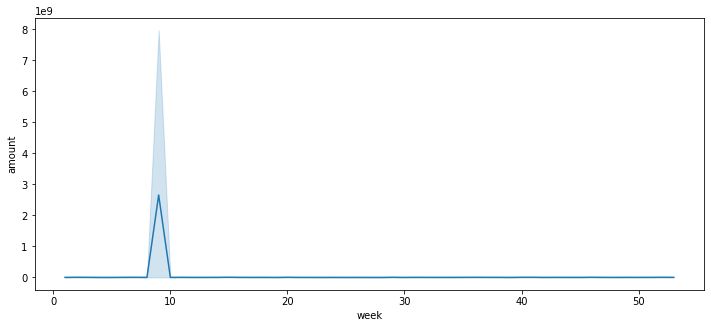

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,5))
sns.lineplot(x='week',y='amount',data=df_clean_2)
plt.plot()

In [ ]:
df_clean_2.describe()

,amount,Month,year,week,day
count,4.926300e+04,49263.000000,49263.000000,49263.000000,49263.000000
mean,1.101396e+08,6.415768,2017.968678,26.647748,21.939650
std,2.378885e+10,3.371857,1.606672,14.553858,8.066977
min,1.000000e+00,1.000000,2014.000000,1.000000,1.000000
25%,8.180000e+03,4.000000,2017.000000,13.000000,17.000000
50%,3.233300e+04,6.000000,2018.000000,26.000000,23.000000
75%,9.000000e+04,9.000000,2019.000000,39.000000,29.000000
max,5.280000e+12,12.000000,2020.000000,53.000000,31.000000


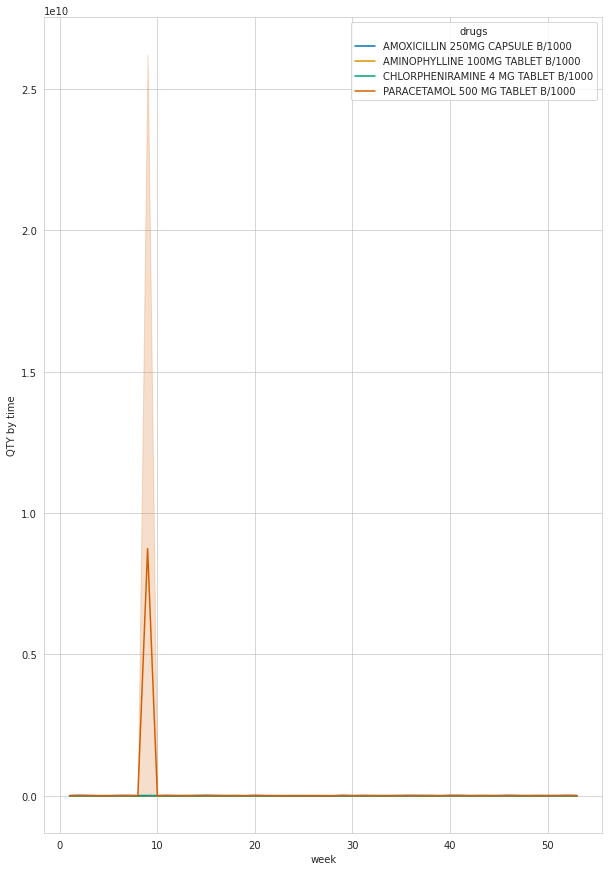

In [ ]:
#Let's have a look at amount by description
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.figure(figsize = (10,15))
sns.lineplot(x = 'week', y = 'amount',hue='drugs', data = df_clean_2, palette = 'colorblind')
plt.xlabel('week')
plt.ylabel('QTY by time')
display()

yearly distribution

[]

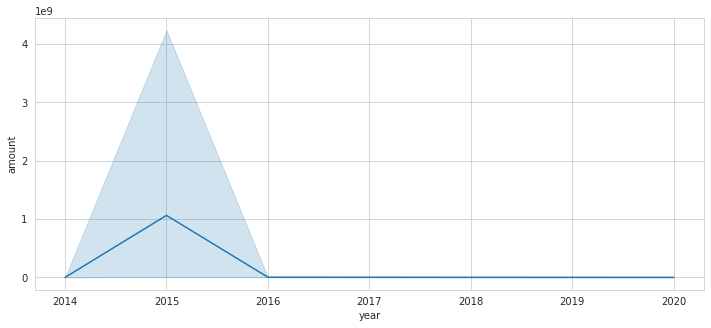

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,5))
sns.lineplot(x='year',y='amount',data=df_clean_2)
plt.plot()

In [ ]:
#dealing with outlier in training dataset
#dealing with outlier
low = .10
high = .90

# Step 1: compute 5% percentile and the 95% percentile of each column in the dataset
quantile_df = df_clean_2.quantile([low, high])
quantile_df

print('Number of rows before outlier removal: {}'.format(df_clean_2.shape))
#print("Dataset after removing outlier: ",x_df_advert.head())
#since outlier has been done on water, it does not be back in the list of columns and categorical data as well.
list_col = ['amount']

for column in list_col:

   df_clean = df_clean_2[(df_clean_2[column] > quantile_df.loc[0.10, column]) & (df_clean_2[column] < quantile_df.loc[0.90, column])]

print("Shape of the dataset without outlier: ",df_clean.shape)

Number of rows before outlier removal: (49263, 8)
Shape of the dataset without outlier:  (39301, 8)


[]

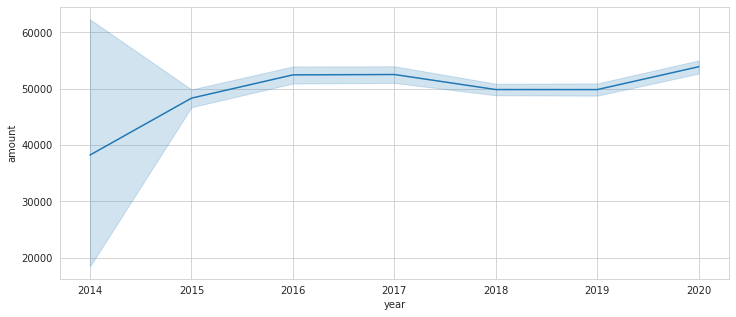

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,5))
sns.lineplot(x='year',y='amount',data=df_clean)
plt.plot()

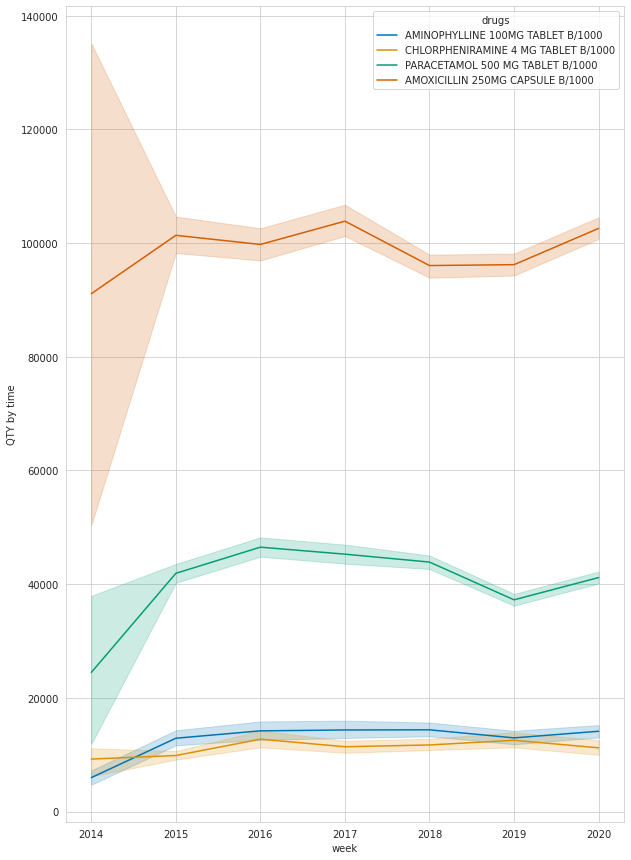

In [ ]:
#Let's have a look at amount by description
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.figure(figsize = (10,15))
sns.lineplot(x = 'year', y = 'amount',hue='drugs', data = df_clean, palette = 'colorblind')
plt.xlabel('week')
plt.ylabel('QTY by time')
display()

Montly Distibution

[]

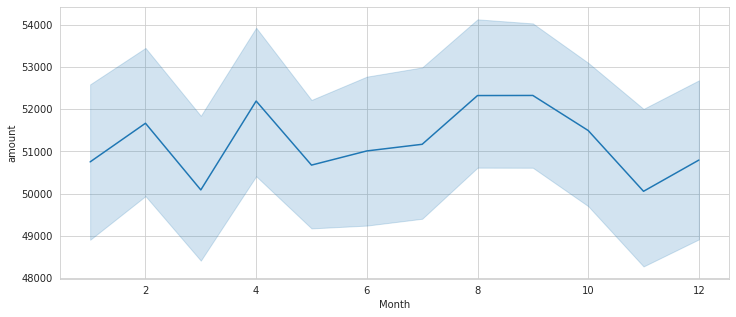

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,5))
sns.lineplot(x='Month',y='amount',data=df_clean)
plt.plot()

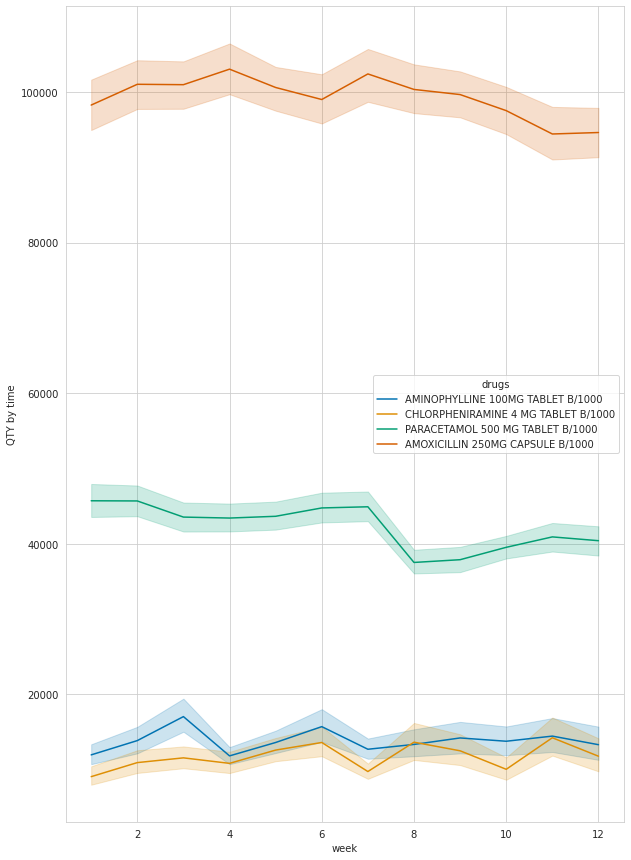

In [ ]:
#Let's have a look at amount by description
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.figure(figsize = (10,15))
sns.lineplot(x = 'Month', y = 'amount',hue='drugs', data = df_clean, palette = 'colorblind')
plt.xlabel('week')
plt.ylabel('QTY by time')
display()

Daily distribution

[]

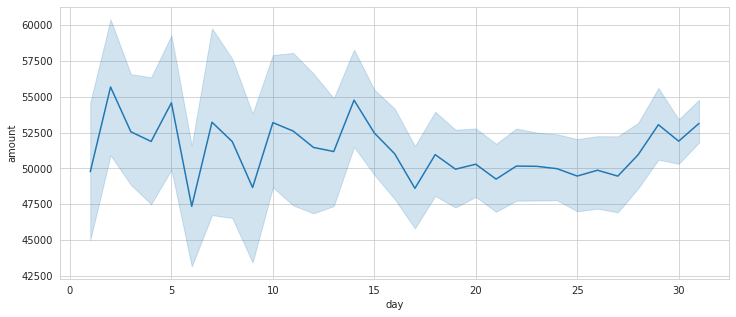

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,5))
sns.lineplot(x='day',y='amount',data=df_clean)
plt.plot()

In [ ]:
# Time Range
df_clean["time"].min(), df_clean["time"].max()

(Timestamp('2014-12-17 05:30:00'), Timestamp('2020-12-10 09:00:00'))

In [ ]:
# Dataframe must be sorted by date because of Time Series Split 
df1 = df_clean.sort_values("time")

# to split test and train 
train = df1.loc[(df1["time"] < "2020-01-01"), :]
test = df1.loc[(df1["time"] >="2020-01-01"), :]
train.shape, test.shape

((30857, 8), (8444, 8))

# Train

Grouping by week

In [ ]:
# grouping total_amount by year, month, week, drugs, and districts
time_series_dd= train.groupby(['year','Month','drugs','distr']).agg(date=('time','first'),
                                                              total_amount=('amount',np.sum)
                                                              ).reset_index().sort_values('date')

In [ ]:
time_series_dd.head()

,year,Month,drugs,distr,date,total_amount
10,2014,12,PARACETAMOL 500 MG TABLET B/1000,Rubavu,2014-12-17 05:30:00,61560
5,2014,12,AMOXICILLIN 250MG CAPSULE B/1000,Rubavu,2014-12-17 05:30:00,408000
2,2014,12,AMINOPHYLLINE 100MG TABLET B/1000,Rubavu,2014-12-18 22:35:00,12900
7,2014,12,CHLORPHENIRAMINE 4 MG TABLET B/1000,Rubavu,2014-12-18 22:35:00,16560
8,2014,12,PARACETAMOL 500 MG TABLET B/1000,Burera,2014-12-22 10:30:00,46110


In [ ]:
time_series_dd.describe()

,year,Month,total_amount
count,5101.000000,5101.000000,5.101000e+03
mean,2017.203490,6.625760,3.053653e+05
std,1.406343,3.438381,4.338080e+05
min,2014.000000,1.000000,3.312000e+03
25%,2016.000000,4.000000,3.336000e+04
50%,2017.000000,7.000000,1.122160e+05
75%,2018.000000,10.000000,4.019840e+05
max,2019.000000,12.000000,3.211000e+06


[]

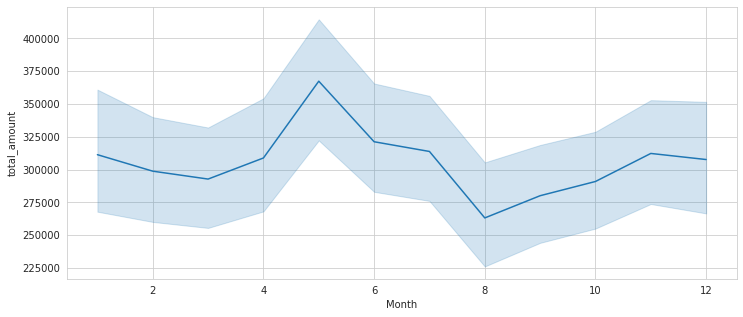

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,5))
sns.lineplot(x='Month',y='total_amount',data=time_series_dd)
plt.plot()

# Test

In [ ]:
# grouping total_amount by year, month, week, drugs, and districts
time_series_test= test.groupby(['year','Month','drugs','distr']).agg(date=('time','first'),
                                                              total_amount=('amount',np.sum)
                                                              ).reset_index().sort_values('date')

[]

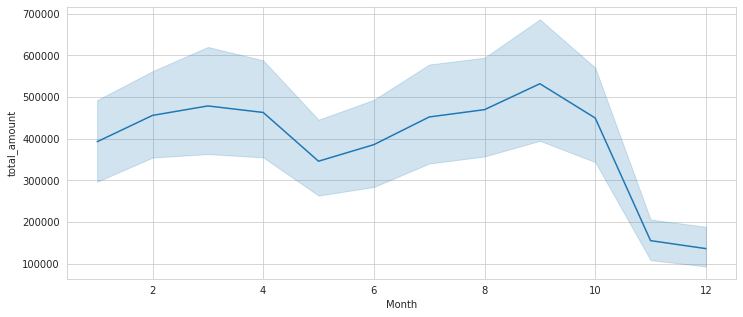

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,5))
sns.lineplot(x='Month',y='total_amount',data=time_series_test)
plt.plot()

Train

In [ ]:
#Add a trend component to our timeseres with drugs added
time_series_dd['trend']= range(time_series_dd.shape[0])
# change month column to category for onehot encoding process
time_series_dd['Month']=time_series_dd['Month'].astype('category')
time_series_dd['drugs']=time_series_dd['drugs'].astype('category')
time_series_dd['distr']=time_series_dd['distr'].astype('category')
# time_series_dd['time']=time_series_dd['time'].astype('datetime64[ns]')
# dropping columns not required in model
X= time_series_dd.drop(['year','date','total_amount'],axis=1)
# dummies and their columns names
names= pd.get_dummies(X).columns
X=pd.get_dummies(X).values
# dependent variable
y= time_series_dd.total_amount.values
y=np.log(y)

Test

In [ ]:
#Add a trend component to our timeseres test
time_series_test['trend']= range(time_series_test.shape[0])
# change month column to category for onehot encoding process
time_series_test['Month']=time_series_test['Month'].astype('category')
time_series_test['drugs']=time_series_test['drugs'].astype('category')
time_series_test['distr']=time_series_test['distr'].astype('category')
# dropping columns not required in model
X_test= time_series_test.drop(['year','date','total_amount'],axis=1)
# dummies and their columns names
names_test= pd.get_dummies(X_test).columns
X_test=pd.get_dummies(X_test).values
# dependent variable
y_test= time_series_test.total_amount.values
y_test=np.log(y_test)

In [ ]:
print(X.shape)
print(X_test.shape)
print(y.shape)
print(y_test.shape)

(5101, 47)
(1102, 47)
(5101,)
(1102,)


In [ ]:
# names

Linear Regression

In [ ]:
model = LinearRegression()
model.fit(X,y)
model.get_params()
model.coef_
# Prediction by model  train
prediction= model.predict(X)

from sklearn.metrics import mean_squared_error
mse_train_d=np.sqrt(mean_squared_error(y,prediction))
print('Mean square error train: ',mse_train_d)

# test Prediction by model
pred_test= model.predict(X_test)
mse_test=np.sqrt(mean_squared_error(y_test,pred_test))
print('Mean square error test: ', mse_test)
diff=mse_train_d-mse_test
print('Mean square error difference between train and test: ', diff)
r_score_train=r2_score(y,prediction)
r_score_test=r2_score(y_test,pred_test)
print('r score of train {}'.format(r_score_train))
print('r score of test{}'.format(r_score_test))

Mean square error train:  0.920213262619428
Mean square error test:  1.1144158173205365
Mean square error difference between train and test:  -0.19420255470110848
r score of train 0.6596151943543321
r score of test0.5843097181552424


In [ ]:
# # function to print feature importances (size of coefficients)
# def print_sorted_feat_importance(weights, colnames):
#     feature_weights = pd.Series(weights, index=colnames)
#     feature_weights_sorted = feature_weights.apply(np.abs).sort_values(ascending=False)

#     for name in feature_weights_sorted.index:
#          print('{:23s}: {:.4f}'.format(name, feature_weights[name]))

# weights=model.coef_
# # print the coefficients in descending order (by absolute value)
# X_colnames = names
# print_sorted_feat_importance(weights, X_colnames)

drugs_AMOXICILLIN 250MG CAPSULE B/1000: 59.0233
drugs_NEVIRAPINE 200MG TABLET B/60: 47.0759
drugs_AMINOPHYLLINE 100MG TABLET B/1000: -36.4397
distr_Muhanga          : 33.4286
drugs_CHLORPHENIRAMINE 4 MG TABLET B/1000: -32.7436
drugs_O.R.S SACHET 20.5G B/100: -31.0107
drugs_ARTE 20MG + LUME 120MG TAB (4X6) B/30: 24.7590
distr_Kayonza          : 24.3761
distr_Nyamagabe        : -15.7229
distr_Nyaruguru        : -15.2415
distr_Karongi          : 14.8879
distr_Ngororero        : -14.8811
drugs_IODINE POLYVIDONE 10%  SLN 200ML B/1: -14.8035
distr_Musanze          : -14.2663
drugs_COTRIMOXAZOLE 480 MG TABLET B/1000: -12.4476
distr_Kicukiro         : -11.7814
distr_Gisagara         : -11.1318
distr_Rwamagana        : 10.5703
distr_Burera           : -10.1203
distr_Rulindo          : -9.9650
distr_Gakenke          : 9.8978
Month_5                : 9.7809
distr_Nyamasheke       : 9.7398
distr_Bugesera         : 9.4556
distr_Nyarugenge       : -8.7804
distr_Nyagatare        : 8.7339
distr_Nyabih

In [ ]:
# model.coef_

In [ ]:
# Add predictions to our timesries data
# prediction=np.abs(prediction)
time_series_dd['predict']=prediction
time_series_dd['y']=y
time_series_dd.head()

,year,Month,drugs,distr,date,total_amount,trend,predict,y
10,2014,12,PARACETAMOL 500 MG TABLET B/1000,Rubavu,2014-12-17 05:30:00,61560,0,11.968285,11.027768
5,2014,12,AMOXICILLIN 250MG CAPSULE B/1000,Rubavu,2014-12-17 05:30:00,408000,1,12.744238,12.919022
2,2014,12,AMINOPHYLLINE 100MG TABLET B/1000,Rubavu,2014-12-18 22:35:00,12900,2,10.131263,9.464983
7,2014,12,CHLORPHENIRAMINE 4 MG TABLET B/1000,Rubavu,2014-12-18 22:35:00,16560,3,9.813651,9.714745
8,2014,12,PARACETAMOL 500 MG TABLET B/1000,Burera,2014-12-22 10:30:00,46110,4,11.126562,10.738785


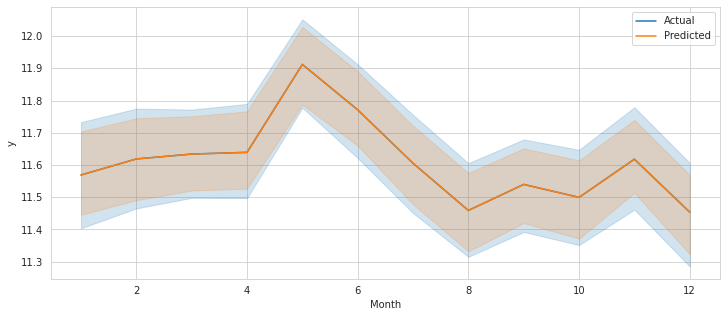

In [ ]:
plt.figure(figsize=(12,5))
sns.lineplot(x='Month',y='y',data=time_series_dd, label='Actual')
sns.lineplot(x='Month',y='predict',data=time_series_dd, label='Predicted')
plt.show()

In [ ]:
# # time=df['time']
# # Save submission file
# df.to_csv('supplier.csv')
# files.download('supplier.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

regr = RandomForestRegressor(n_estimators=10000,max_depth=10, max_features=10, min_samples_leaf=5,random_state=0)
regr.fit(X, y)
y_pred1 = regr.predict(X)
y_pred2 = regr.predict(X_test)

MSE_train= np.sqrt(mean_squared_error(y,y_pred1))
MSE_test= np.sqrt(mean_squared_error(y_test,y_pred2))
print('mean square error of train {}'.format(MSE_train))
print('mean square error of test {}'.format(MSE_test))
r_score_train=r2_score(y,y_pred1)
r_score_test=r2_score(y_test,y_pred2)
print('r score of train {}'.format(r_score_train))
print('r score of test{}'.format(r_score_test))

mean square error of train 0.8750278434117796
mean square error of test 1.1177695558419636
r score of train 0.6922224530151575
r score of test0.5818039851490288


mean square error of train 0.8710706958373147 <br>
mean square error of test 1.202160889442075 <br>
r score of train 0.6515765249884355 <br>
r score of test0.39918083746596345 

mean square error of train 36.19057870836433 <br>
r score of train 0.608312020869344

In [ ]:
# function to print feature importances (size of coefficients)
def print_sorted_feat_importance(weights, colnames):
    feature_weights = pd.Series(weights, index=colnames)
    feature_weights_sorted = feature_weights.apply(np.abs).sort_values(ascending=False)

    for name in feature_weights_sorted.index:
         print('{:23s}: {:.4f}'.format(name, feature_weights[name]))

weights=regr.feature_importances_
# print the coefficients in descending order (by absolute value)
X_colnames = names
print_sorted_feat_importance(weights, X_colnames)
# importance = regr.feature_importances_
# summarize feature importance
# for i,v in enumerate(weights):
# 	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
# pyplot.bar(X_colnames, importance)
# pyplot.show()

trend                  : 0.2917
drugs_AMOXICILLIN 250MG CAPSULE B/1000: 0.2420
drugs_ARTE 20MG + LUME 120MG TAB (4X6) B/30: 0.0633
distr_Kayonza          : 0.0337
drugs_PARACETAMOL 500 MG TABLET B/1000: 0.0207
distr_Karongi          : 0.0202
distr_Gakenke          : 0.0201
distr_Nyagatare        : 0.0161
distr_Bugesera         : 0.0159
drugs_O.R.S SACHET 20.5G B/100: 0.0149
drugs_AMINOPHYLLINE 100MG TABLET B/1000: 0.0138
distr_Kirehe           : 0.0121
distr_Burera           : 0.0111
distr_Musanze          : 0.0109
distr_Muhanga          : 0.0105
distr_Rwamagana        : 0.0097
Month_5                : 0.0089
distr_Nyabihu          : 0.0088
distr_Nyamasheke       : 0.0083
distr_Rubavu           : 0.0082
distr_Nyaruguru        : 0.0078
distr_Ngoma            : 0.0075
drugs_CHLORPHENIRAMINE 4 MG TABLET B/1000: 0.0074
distr_Kamonyi          : 0.0073
distr_Gasabo           : 0.0071
Month_6                : 0.0069
distr_Ngororero        : 0.0068
distr_Gisagara         : 0.0067
distr_Nyamaga

In [ ]:
time_series_dd['pred']=y_pred1
time_series_dd.head()

,year,Month,drugs,distr,date,total_amount,trend,predict,y,pred
10,2014,12,PARACETAMOL 500 MG TABLET B/1000,Rubavu,2014-12-17 05:30:00,61560,0,11.968285,11.027768,12.008369
5,2014,12,AMOXICILLIN 250MG CAPSULE B/1000,Rubavu,2014-12-17 05:30:00,408000,1,12.744238,12.919022,12.653545
2,2014,12,AMINOPHYLLINE 100MG TABLET B/1000,Rubavu,2014-12-18 22:35:00,12900,2,10.131263,9.464983,10.244745
7,2014,12,CHLORPHENIRAMINE 4 MG TABLET B/1000,Rubavu,2014-12-18 22:35:00,16560,3,9.813651,9.714745,10.186376
8,2014,12,PARACETAMOL 500 MG TABLET B/1000,Burera,2014-12-22 10:30:00,46110,4,11.126562,10.738785,11.736573


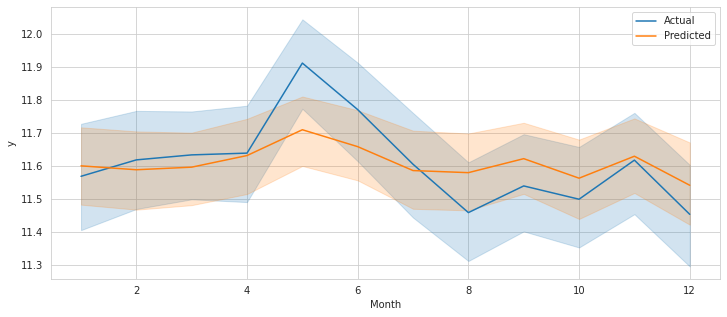

In [ ]:
plt.figure(figsize=(12,5))
sns.lineplot(x='Month',y='y',data=time_series_dd, label='Actual')
sns.lineplot(x='Month',y='pred',data=time_series_dd, label='Predicted')
plt.show()

In [ ]:
X.shape

(9600, 53)

In [ ]:
y.shape

(10641,)

# Neural Network

In [ ]:

reg = l2(0.08)

from keras import Sequential 
from keras.layers import Dense
def build_regressor():    
  regressor = Sequential()    
  regressor.add(Dense(units=300, input_dim=46, kernel_regularizer=reg))  
  regressor.add(Dense(units=300, activation='relu', kernel_regularizer=reg))
  regressor.add(Dense(units=150, activation='relu', kernel_regularizer=reg))
  regressor.add(Dense(units=150, activation='relu', kernel_regularizer=reg))
  regressor.add(Dense(units=75, activation='relu', kernel_regularizer=reg))
  regressor.add(Dense(units=75, activation='relu', kernel_regularizer=reg))
  regressor.add(Dense(units=50, activation='relu', kernel_regularizer=reg))
  regressor.add(Dense(units=50, activation='relu', kernel_regularizer=reg))
  regressor.add(Dense(units=25, activation='relu', kernel_regularizer=reg))
  regressor.add(Dense(units=25, activation='relu', kernel_regularizer=reg))
  regressor.add(Dense(units=1))  
  # regressor.add(Dense(y_train, activation='linear', kernel_regularizer=reg))
  regressor.compile(optimizer='adam', loss='mean_squared_error',  metrics=['mae','accuracy'])    
  return regressor

from keras.wrappers.scikit_learn import KerasRegressor 
regressor = KerasRegressor(build_fn=build_regressor, batch_size=64,epochs=1000)

regressor.fit(X,y)

# y_pred= regressor.predict(X_test)
y_pred_tr=regressor.predict(X)

MSE_train= mean_squared_error(y,y_pred_tr)
# MSE_test= mean_squared_error(y_test,y_pred)
print('mean square error of train {}'.format(MSE_train))
# print('mean square error of test {}'.format(MSE_test))
r_score_train=r2_score(y,y_pred_tr)
# r_score_test=r2_score(y_test,y_pred)
print('r score of train {}'.format(r_score_train))
# print('r score of test{}'.format(r_score_test))


Epoch 1/1000
59/59 [==============================] - 13s 7ms/step - loss: 144.4276 - mae: 6.8855 - accuracy: 0.0000e+00
Epoch 2/1000
59/59 [==============================] - 0s 7ms/step - loss: 70.7552 - mae: 4.6513 - accuracy: 0.0000e+00
Epoch 3/1000
59/59 [==============================] - 0s 7ms/step - loss: 61.1733 - mae: 4.5302 - accuracy: 0.0000e+00
Epoch 4/1000
59/59 [==============================] - 0s 7ms/step - loss: 55.0593 - mae: 4.2696 - accuracy: 0.0000e+00
Epoch 5/1000
59/59 [==============================] - 0s 7ms/step - loss: 53.6201 - mae: 4.2894 - accuracy: 0.0000e+00
Epoch 6/1000
59/59 [==============================] - 0s 7ms/step - loss: 50.1340 - mae: 4.0602 - accuracy: 0.0000e+00
Epoch 7/1000
59/59 [==============================] - 0s 7ms/step - loss: 46.2837 - mae: 3.7923 - accuracy: 0.0000e+00
Epoch 8/1000
59/59 [==============================] - 0s 7ms/step - loss: 41.7985 - mae: 3.4413 - accuracy: 0.0000e+00
Epoch 9/1000
59/59 [==========================

In [ ]:
np.sqrt(1.7043217734041205)

1.305496753501946

In [ ]:
time_series_dd['preds']=y_pred_tr
time_series_dd.tail()

,year,Month,week,drugs,distr,date,total_amount,trend,prediction,pred,preds
35348,2020,12,50,AMOXICILLIN 250MG CAPSULE B/1000,Rulindo,2020-12-10 09:00:00,5000,23830,9998.845459,6668.197461,10088.444336
35357,2020,12,50,CHLORPHENIRAMINE 4 MG TABLET B/1000,Bugesera,2020-12-10 09:00:00,3000,23831,8177.265747,5605.791156,9247.953125
35351,2020,12,50,ARTE 20MG + LUME 120MG TAB (4X6) B/30,Bugesera,2020-12-10 09:00:00,300,23832,2031.982056,1617.142625,2610.724854
35340,2020,12,50,AMOXICILLIN 250MG CAPSULE B/1000,Gatsibo,2020-12-10 09:00:00,10000,23833,12650.268677,9927.683408,13837.881836
35345,2020,12,50,AMOXICILLIN 250MG CAPSULE B/1000,Muhanga,2020-12-10 17:30:00,300,23834,11970.383057,7277.539891,13182.071289


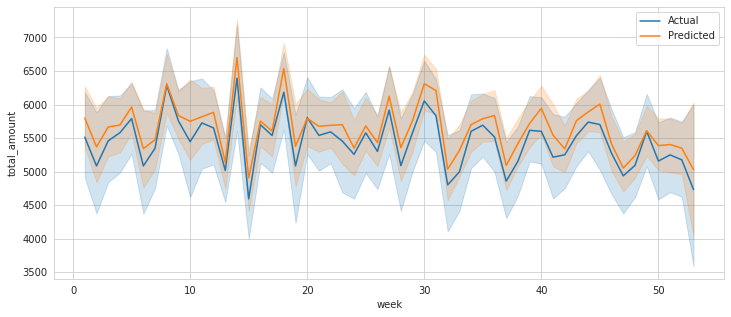

In [ ]:
# drugs and district added
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,5))
sns.lineplot(x='week',y='total_amount',data=time_series_dd, label='Actual')
sns.lineplot(x='week',y='preds',data=time_series_dd, label='Predicted')
plt.show()

# Gradient Boosting for regression

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, ensemble
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [ ]:
params = {'n_estimators': 18000,
          'max_depth': 10,
          'min_samples_split': 10,
          'learning_rate': 0.001,
          'loss': 'ls'}

reg_b = ensemble.GradientBoostingRegressor(**params)
reg_b.fit(X, y)

mse = np.sqrt(mean_squared_error(y, reg_b.predict(X)))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))
r_score_train=r2_score(y,reg_b.predict(X))
print('r score of train {}'.format(r_score_train))

The mean squared error (MSE) on test set: 0.3398
r score of train 0.9535736520532216


The mean squared error (MSE) on test set: 0.0004 <br>
r score of train 0.9999998942523654

with this archtecture <br>

params = {'n_estimators': 30000,
          'max_depth': 30,
          'min_samples_split': 30,
          'learning_rate': 0.01,
          'loss': 'ls'}

In [ ]:
mse_t = np.sqrt(mean_squared_error(y_test, reg_b.predict(X_test)))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse_t))
r_score_t=r2_score(y_test,reg_b.predict(X_test))
print('r score of train {}'.format(r_score_t))

The mean squared error (MSE) on test set: 1.3714
r score of train 0.3704459968025754


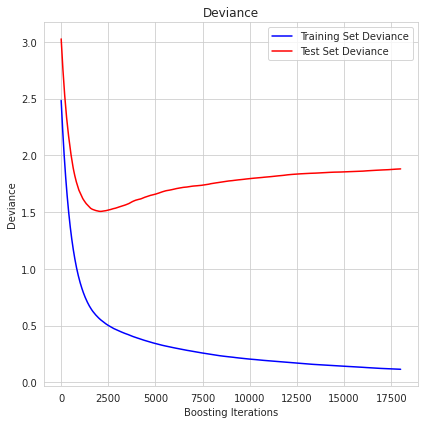

In [ ]:
test_score = np.zeros((params['n_estimators'],), dtype=np.float64)
for i, y_pred in enumerate(reg_b.staged_predict(X_test)):
    test_score[i] = reg_b.loss_(y_test, y_pred)

fig = plt.figure(figsize=(6, 6))
plt.subplot(1, 1, 1)
plt.title('Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, reg_b.train_score_, 'b-',
         label='Training Set Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, test_score, 'r-',
         label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')
fig.tight_layout()
plt.show()


Links

https://www.kaggle.com/tqrahman/baseline-lstm-w-dropout-3x64 (LSTM (1))

https://www.kaggle.com/husammohammad/time-series-model-sarimax-vs-lstm-vs-fbprophet (different timeseries model)

https://www.kaggle.com/yashvi/time-series-forecasting-using-lstm-m5 (LSTM 2)

https://www.kaggle.com/kowaalczyk/lstm-with-convolutions (LSTM 3)



LSTM

In [ ]:
df_clean.head()

,time,drugs,distr,amount
3,2015-11-17 02:09:00,AMOXICILLIN 250MG CAPSULE B/1000,Bugesera,2114800
5,2015-11-17 02:09:00,AMINOPHYLLINE 100MG TABLET B/1000,Bugesera,148440
8,2015-10-13 21:47:00,AMINOPHYLLINE 100MG TABLET B/1000,Bugesera,74220
16,2016-05-01 09:00:00,AMINOPHYLLINE 100MG TABLET B/1000,Bugesera,74220
17,2016-05-01 09:00:00,AMOXICILLIN 250MG CAPSULE B/1000,Bugesera,319260


In [ ]:
df_clean_2 = df_clean.loc[df_clean["amount"] >= 1.00]
print(df_clean.shape)
print(df_clean_2.shape)

(49272, 4)
(49263, 4)


In [ ]:
#dealing with outlier in training dataset
#dealing with outlier
low = .10
high = .90

# Step 1: compute 5% percentile and the 95% percentile of each column in the dataset
quantile_df = df_clean_2.quantile([low, high])
quantile_df

print('Number of rows before outlier removal: {}'.format(df_clean_2.shape))
#print("Dataset after removing outlier: ",x_df_advert.head())
#since outlier has been done on water, it does not be back in the list of columns and categorical data as well.
list_col = ['amount']

for column in list_col:

   df_clean = df_clean_2[(df_clean_2[column] > quantile_df.loc[0.10, column]) & (df_clean_2[column] < quantile_df.loc[0.90, column])]

print("Shape of the dataset without outlier: ",df_clean.shape)

Number of rows before outlier removal: (49263, 4)
Shape of the dataset without outlier:  (39301, 4)


In [ ]:
# adding year, month, and week column in a train dataframe
df_clean['Month']=df_clean.time.dt.month
df_clean['year']=df_clean.time.dt.year
df_clean['week']=df_clean.time.dt.week
df_clean['day']=df_clean.time.dt.day
df_clean.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  after removing the

,time,drugs,distr,amount,Month,year,week,day
5,2015-11-17 02:09:00,AMINOPHYLLINE 100MG TABLET B/1000,Bugesera,148440,11,2015,47,17
8,2015-10-13 21:47:00,AMINOPHYLLINE 100MG TABLET B/1000,Bugesera,74220,10,2015,42,13
16,2016-05-01 09:00:00,AMINOPHYLLINE 100MG TABLET B/1000,Bugesera,74220,5,2016,17,1
23,2016-06-06 09:00:00,CHLORPHENIRAMINE 4 MG TABLET B/1000,Bugesera,79000,6,2016,23,6
31,2016-05-07 09:00:00,CHLORPHENIRAMINE 4 MG TABLET B/1000,Bugesera,118500,5,2016,18,7


In [ ]:
# grouping total_amount by year, month, week, drugs, and districts
time_series_lstm= df_clean.groupby(['year','Month','drugs','distr']).agg(date=('time','first'),
                                                              total_amount=('amount',np.sum)
                                                              ).reset_index().sort_values('date')

In [ ]:
# Group by two columns
df = tips.groupby(['smoker','time']).mean()
df

In [ ]:
time_series_lstm.head(15)

,year,Month,drugs,distr,date,total_amount
5,2014,12,AMOXICILLIN 250MG CAPSULE B/1000,Rubavu,2014-12-17 05:30:00,408000
10,2014,12,PARACETAMOL 500 MG TABLET B/1000,Rubavu,2014-12-17 05:30:00,61560
0,2014,12,AMINOPHYLLINE 100MG TABLET B/1000,Burera,2014-12-22 10:30:00,6960
3,2014,12,AMOXICILLIN 250MG CAPSULE B/1000,Burera,2014-12-22 10:30:00,38280
6,2014,12,CHLORPHENIRAMINE 4 MG TABLET B/1000,Burera,2014-12-22 10:30:00,11136
8,2014,12,PARACETAMOL 500 MG TABLET B/1000,Burera,2014-12-22 10:30:00,46110
1,2014,12,AMINOPHYLLINE 100MG TABLET B/1000,Gicumbi,2014-12-24 11:00:00,9988
4,2014,12,AMOXICILLIN 250MG CAPSULE B/1000,Gicumbi,2014-12-24 11:00:00,100320
9,2014,12,PARACETAMOL 500 MG TABLET B/1000,Gicumbi,2014-12-24 11:00:00,14700
2,2014,12,AMINOPHYLLINE 100MG TABLET B/1000,Rubavu,2014-12-28 10:10:00,12900


In [ ]:
print(time_series_lstm.shape)
print(df_clean.shape)

(6203, 6)
(39301, 8)


In [ ]:
data=time_series_lstm[['date','total_amount','drugs','distr']]

In [ ]:
data['total_amount'].values

array([408000,  61560,   6960, ...,  55200, 504227, 105000])

In [ ]:
# data.index.name = 'time'
data.set_index('date',inplace=True) 
data.head()

,total_amount,drugs,distr
date,,,
2014-12-17 05:30:00,408000,AMOXICILLIN 250MG CAPSULE B/1000,Rubavu
2014-12-17 05:30:00,61560,PARACETAMOL 500 MG TABLET B/1000,Rubavu
2014-12-22 10:30:00,6960,AMINOPHYLLINE 100MG TABLET B/1000,Burera
2014-12-22 10:30:00,38280,AMOXICILLIN 250MG CAPSULE B/1000,Burera
2014-12-22 10:30:00,11136,CHLORPHENIRAMINE 4 MG TABLET B/1000,Burera


In [ ]:
dd=data.values

In [ ]:
dd[:,1:2]

array([['AMOXICILLIN 250MG CAPSULE B/1000'],
       ['PARACETAMOL 500 MG TABLET B/1000'],
       ['AMINOPHYLLINE 100MG TABLET B/1000'],
       ...,
       ['AMOXICILLIN 250MG CAPSULE B/1000'],
       ['AMOXICILLIN 250MG CAPSULE B/1000'],
       ['PARACETAMOL 500 MG TABLET B/1000']], dtype=object)

In [ ]:
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
 
# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

values = data.values
# integer encode direction
encoder = LabelEncoder()
values[:,1] = encoder.fit_transform(values[:,1].astype(str))
values[:,2] = encoder.fit_transform(values[:,2].astype(str))
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)
# drop columns we don't want to predict
reframed.drop(reframed.columns[[4,5]], axis=1, inplace=True)
print(reframed.head())

   var1(t-1)  var2(t-1)  var3(t-1)   var1(t)
1   0.106795   0.333333   0.827586  0.015371
2   0.015371   1.000000   0.827586  0.000963
3   0.000963   0.000000   0.034483  0.009228
4   0.009228   0.333333   0.034483  0.002065
5   0.002065   0.666667   0.034483  0.011294


In [ ]:
# split into train and test sets
values = reframed.values
# n_train_hours = (365 * 18)
train = values[:5001, :]
test = values[5001:, :]
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(5001, 1, 3) (5001,) (1201, 1, 3) (1201,)


Epoch 1/200
70/70 - 3s - loss: 0.0710 - val_loss: 0.0953
Epoch 2/200
70/70 - 0s - loss: 0.0697 - val_loss: 0.0950
Epoch 3/200
70/70 - 0s - loss: 0.0697 - val_loss: 0.0949
Epoch 4/200
70/70 - 0s - loss: 0.0697 - val_loss: 0.0949
Epoch 5/200
70/70 - 0s - loss: 0.0697 - val_loss: 0.0948
Epoch 6/200
70/70 - 0s - loss: 0.0697 - val_loss: 0.0948
Epoch 7/200
70/70 - 0s - loss: 0.0697 - val_loss: 0.0948
Epoch 8/200
70/70 - 0s - loss: 0.0697 - val_loss: 0.0948
Epoch 9/200
70/70 - 0s - loss: 0.0697 - val_loss: 0.0949
Epoch 10/200
70/70 - 0s - loss: 0.0697 - val_loss: 0.0949
Epoch 11/200
70/70 - 0s - loss: 0.0697 - val_loss: 0.0950
Epoch 12/200
70/70 - 0s - loss: 0.0697 - val_loss: 0.0950
Epoch 13/200
70/70 - 0s - loss: 0.0697 - val_loss: 0.0950
Epoch 14/200
70/70 - 0s - loss: 0.0697 - val_loss: 0.0950
Epoch 15/200
70/70 - 0s - loss: 0.0697 - val_loss: 0.0951
Epoch 16/200
70/70 - 0s - loss: 0.0697 - val_loss: 0.0950
Epoch 17/200
70/70 - 0s - loss: 0.0697 - val_loss: 0.0949
Epoch 18/200
70/70 - 0s

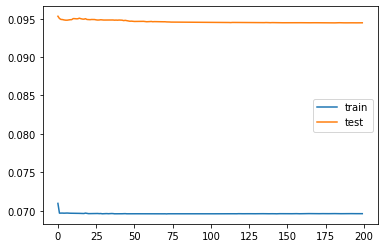

In [ ]:
# design network
model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
# fit network
history = model.fit(train_X, train_y, epochs=200, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False)
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [ ]:
# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))
# invert scaling for forecast
inv_yhat = concatenate((yhat, test_X[:, 1:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = concatenate((test_y, test_X[:, 1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 610048.886


In [ ]:
test_X[:, 0:]

array([[4.2615853e-02, 0.0000000e+00, 8.9655173e-01],
       [2.7088544e-01, 3.3333334e-01, 9.3103451e-01],
       [1.1189987e-01, 1.0000000e+00, 9.6551722e-01],
       ...,
       [6.0379144e-04, 0.0000000e+00, 0.0000000e+00],
       [1.3692976e-02, 3.3333334e-01, 8.9655173e-01],
       [1.3218890e-01, 3.3333334e-01, 3.1034482e-01]], dtype=float32)

In [ ]:
inv_y

array([27., 28., 29., ..., 26.,  9.,  4.], dtype=float32)

In [ ]:
MSE_train= sqrt(mean_squared_error(inv_y,inv_yhat))
MSE_test= sqrt(mean_squared_error(test_y,inv_y))
print('mean square error of train {}'.format(MSE_train))
print('mean square error of test {}'.format(MSE_test))
r_score_train=r2_score(inv_y,inv_yhat)
# r_score_test=r2_score(test_y,inv_y)
print('r score of train {}'.format(r_score_train))
# print('r score of test{}'.format(r_score_test))

mean square error of train 610048.8862771573
mean square error of test 683690.5974371741
r score of train -0.2290386664781705


In [ ]:
reframed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6202 entries, 1 to 6202
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   var1(t-1)  6202 non-null   float32
 1   var2(t-1)  6202 non-null   float32
 2   var3(t-1)  6202 non-null   float32
 3   var1(t)    6202 non-null   float32
dtypes: float32(4)
memory usage: 145.4 KB
